# Constraints If-Then

Dorian Auto está considerando fabricar tres tipos de automóviles: compactos, medianos y
grande. Se muestran los recursos necesarios y los beneficios obtenidos por cada tipo de automóvil.
en el Cuadro 8. Actualmente, se encuentran disponibles 6.000 toneladas de acero y 60.000 horas de mano de obra. Para que la producción de un tipo de automóvil sea económicamente viable, deben fabricarse al menos 1.000 automóviles de ese tipo.
producido. Formule una IP para maximizar las ganancias de Dorian.

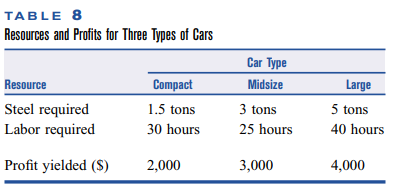

¿Cómo modificarían las siguientes restricciones la
formulación del ejemplo 6 (tamaños de los automóviles Dorian)? (Haz cada parte
por separado.)
a Si se producen autos medianos, entonces los compactos deben
también ser producido.
b Deben fabricarse automóviles compactos o grandes.

## Conjuntos

$ i = \text{Tipo de auto indexado por } i$

$ j = \text{recurso indexado por } j $

## Parámetros

$ MM_{j} = \textrm{Máximo número de recurso permitido } j$

$ R_{ij} = \textrm{Recurso disponible  }j \textrm{ para el tipo de auto }i $

$ M = \textrm{Número muy grande para conectar variables } $

$ I_{i} = \textrm{Ingresos del auto } i $

## Variables de decisión

$ x_{i} = \textrm{Número de autos } i \textrm{ producidos} $

$ y_{i} = \textrm{1 si se producen 1000 autos } i \textrm{ o más, 0 lo contrario} $

$ z = \textrm{Variable auxiliar para la restricción si - entonces }$


## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i}\: x_{i} $$

No se puede sobrepasar el número de recursos disponibles,

$$ \sum_{i = 1}^{n} R_{ij}\: x_{i} \leq MM_{j}, \forall j$$

Si se producen autos medianos, también deben producirse autos compactos,

$$ -x_{1} \leq  Mz $$

$$ x_{2} \leq M(1-z) $$

Se debe producir 1000 o más por tipo de auto, o no se produce.

$$ x_{i} \leq My_{i} $$

$$ 1000 - x_{i} \leq M (1 - y_{i}) $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 17.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [5]:
#Conjuntos
autos = range(3)
recursos = range(2)

In [8]:
I = [2000, 3000, 4000]

R = [[30, 25, 40], [1.5, 3, 5]]

MM = [60000, 6000]

M = 1000000

In [17]:
# Crear la instancia del modelo
model = LpProblem(name="Dorian_Auto_If_Then", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (autos), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (autos), 0, 1, LpInteger)
Z = LpVariable("Z", 0, 1, LpInteger)

# Función objetivo
model += lpSum([I[i] * X[i] for i in autos])


# Agregar las restricciones

for j in recursos:
    model += lpSum([R[j][i] * X[i] for i in autos]) <= MM[j]

for i in autos:
    model += X[i] <= M * Y[i]
    model += 1000 - X[i] <= M * (1 - Y[i])

model += -X[0] <=  M * Z
model += X[1] <= M * (1 - Z)

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades totales = $", value(model.objective))

Status: Optimal
X_0 = 0.0
X_1 = 2000.0
X_2 = 0.0
Y_0 = 0.0
Y_1 = 1.0
Y_2 = 0.0
Z = 0.0
Utilidades totales = $ 6000000.0
